In week three, we will introduce level 1b data (actual top-of-atmosphere observations, with sensor correction/calibration). The excercises will familiarise students with Numpy arrays and plotting with Matplotlib. We will explicitly discuss the differences between these images and the "ideal" image - lighting, angle, aerosols, clouds and shadow - and attempt to create a single "good" image from a time-series of images.

This notebook is actually the week four work, because all the data has been moved recently and I need to chanse friends at GA to find it again. The task is to start with masked NBART (georeferenced, nadir-corrected bidirectional reflectance, terrain-corrected; a level 3 product) and calculate useful information based on it, then visualise and present that information.

The data is a sequence of images taken before and after the 2009 Victorian bushfires.

(todo: needs more commentary and prompts; currently just Zac's demo of a few things)

In [1]:
import xarray as xr
%matplotlib inline

C:\Anaconda3\lib\site-packages\xarray\core\formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
# Open the dataset, delete unwanted entries, (down)load, and fix scale.
# Will extract better data for actual lab but this is what I have today.
ds = xr.open_dataset('http://dapds00.nci.org.au/thredds/dodsC/ub8/au/lab/BlackSaturday_2009_landsat5_VIC.nc')
del ds['NDVI']
del ds['pixmask']
ds.load()
ds /= 2 ** 14
ds

<xarray.Dataset>
Dimensions:  (time: 3, x: 988, y: 822)
Coordinates:
  * x        (x) float64 1.144e+06 1.144e+06 1.144e+06 1.144e+06 1.144e+06 ...
  * y        (y) float64 -4.116e+06 -4.116e+06 -4.116e+06 -4.116e+06 ...
  * time     (time) datetime64[ns] 2009-01-31T23:48:57.500000 ...
Data variables:
    blue     (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    green    (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    red      (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    nir      (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    swir1    (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    swir2    (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    _NCProperties: version=1|netcdflibversion=4.4.1.1|hdf5libversion=1.10.1
    geospatial_bounds_crs: EPSG:4326
    lat_min: -37.78
    lat_max: -37.78
    lon_min: 144.93
    lon_max: 145.96

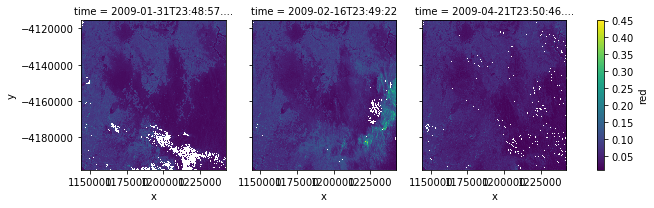

In [3]:
# Needs more buildup to this bit; both teaching the Xarray API and NetCDF concepts 
# (I think the power and learning curve is still net easier for students, and graphs are much nicer)
ds.red.plot.imshow(col='time')

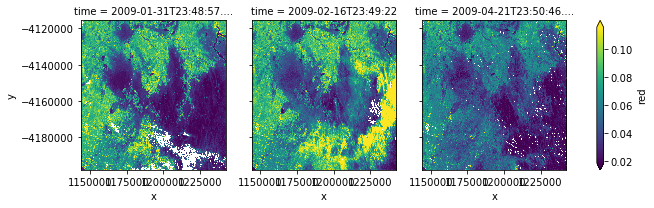

In [4]:
# Look, magically nicer!  Needs notes on masking (white area), 
# colormap was introduced in week 3 so that's ok,
# cover what the col= argument is doing (facets), [and needed because time dim of size 3 ~ RGB confusion]
# discuss (in week 3?) difference between RGB image plots and single-band with colormap
ds.red.plot.imshow(robust=True, col='time')

Here we probably have some stuff about band math, i.e. NDVI / bare soil measures / burned area measures / etc. Some pixel counting and conditionals on arrays too.

Now, moving on to the data visualisation part: students should at least consider RGB true-color as it's interpretable for anyone, draw a colormapped image, summarise data to a standard graph.

In [5]:
# Make an RGB timeseries.  Dimensions in wrong order but Xarray will reorder on the fly.
rgb = xr.concat([ds.red, ds.green, ds.blue], dim='band')
rgb

<xarray.DataArray 'red' (band: 3, time: 3, y: 822, x: 988)>
array([[[[      nan, ...,  0.084839],
         ..., 
         [ 0.025146, ...,  0.0224  ]],

        ..., 
        [[      nan, ...,  0.085388],
         ..., 
         [ 0.033447, ...,  0.017029]]],


       ..., 
       [[[      nan, ...,  0.047424],
         ..., 
         [ 0.036682, ...,  0.015625]],

        ..., 
        [[      nan, ...,  0.054382],
         ..., 
         [ 0.048462, ...,  0.011658]]]], dtype=float32)
Coordinates:
  * x        (x) float64 1.144e+06 1.144e+06 1.144e+06 1.144e+06 1.144e+06 ...
  * y        (y) float64 -4.116e+06 -4.116e+06 -4.116e+06 -4.116e+06 ...
  * time     (time) datetime64[ns] 2009-01-31T23:48:57.500000 ...
Dimensions without coordinates: band

ValueError: DataArray must be 2d

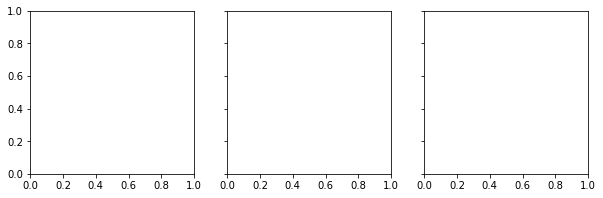

In [6]:
# Tada!
rgb.plot.imshow(col='time', robust=True)

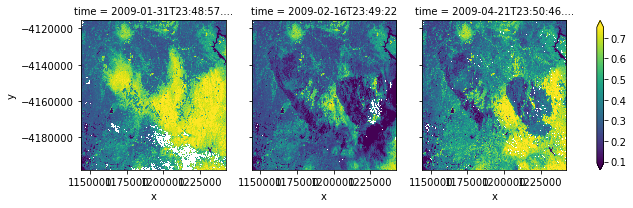

In [7]:
# The "Normalised Difference Vegetation Index" is a simple measure of plant presence.
# (physically, it's the "red edge" due to chlorophyll's high NIR reflectance.)
ndvi = (ds.nir - ds.red) / (ds.nir + ds.red)
ndvi.plot.imshow(col='time', robust=True)

# While in the true-color forest looks similar to burned area, 
# in NDVI the difference is obvious!  You can clearly see the burn,
# and also the start of recovery in the last image.

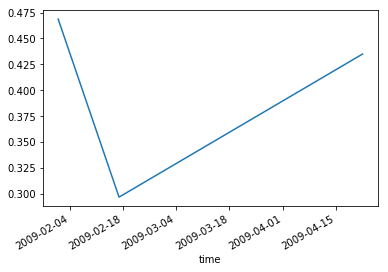

In [9]:
# We can see the change in NDVI over time...
ndvi.mean(dim=('x', 'y')).plot()

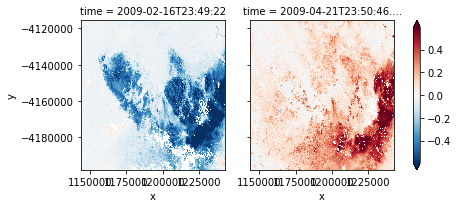

In [11]:
# ...or even plot it per-pixel.  
# You can also see the effect of un-masked cloud on the right side!
ndvi.diff('time').plot.imshow(col='time', robust=True)